<a href="https://colab.research.google.com/github/hyyga/Deep-Learning-GSLC-1-/blob/main/GSLC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import File

In [3]:
from google.colab import files
uploaded = files.upload()

Saving archive (9).zip to archive (9).zip


In [4]:
import zipfile
import os

with zipfile.ZipFile("archive (9).zip", "r") as zip_ref:
    zip_ref.extractall(".")

# Cek hasil ekstraksi
os.listdir()


['.config', 'archive (9).zip', 'hymenoptera_data', 'sample_data']

# Library

In [14]:
# import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt

# Preprocess


In [15]:
train_dir = "hymenoptera_data/train"
val_dir = "hymenoptera_data/val"

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=32
)

# Normalisasi
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


Found 245 files belonging to 2 classes.
Found 153 files belonging to 2 classes.


#CNN

In [17]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 kelas: ants dan bees
])

model_cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = model_cnn.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.4716 - loss: 1.5699 - val_accuracy: 0.4771 - val_loss: 0.7014
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 38s 5s/step - accuracy: 0.5591 - loss: 0.6872 - val_accuracy: 0.4706 - val_loss: 0.6946
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.5948 - loss: 0.6785 - val_accuracy: 0.5425 - val_loss: 0.7135
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.5971 - loss: 0.6782 - val_accuracy: 0.5425 - val_loss: 0.6998
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.6150 - loss: 0.6500 - val_accuracy: 0.6340 - val_loss: 0.6671
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.7317 - loss: 0.5488 - val_accuracy: 0.5882 - val_loss: 0.7277
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.7101 - loss: 0.5446 - val_accuracy: 0.6797 - val_loss: 0.6166
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.8418 - loss: 0.3802 - val_accuracy: 0.6667 - val_loss: 0.6720
Epoch 9/

In [18]:
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model_mobilenet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model_mobilenet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_mobilenet = model_mobilenet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.7120 - loss: 0.6869 - val_accuracy: 0.8562 - val_loss: 0.3068
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9329 - loss: 0.1951 - val_accuracy: 0.9150 - val_loss: 0.1989
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9616 - loss: 0.0678 - val_accuracy: 0.8889 - val_loss: 0.2672
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9909 - loss: 0.0410 - val_accuracy: 0.9281 - val_loss: 0.1685
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9855 - loss: 0.0510 - val_accuracy: 0.9281 - val_loss: 0.1632


# Visualisasi

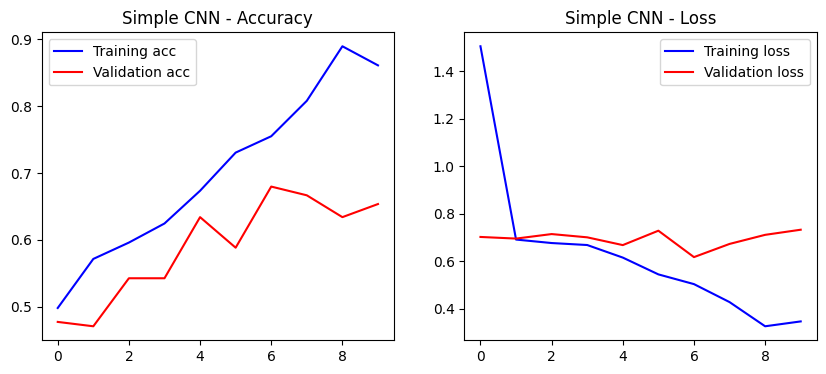

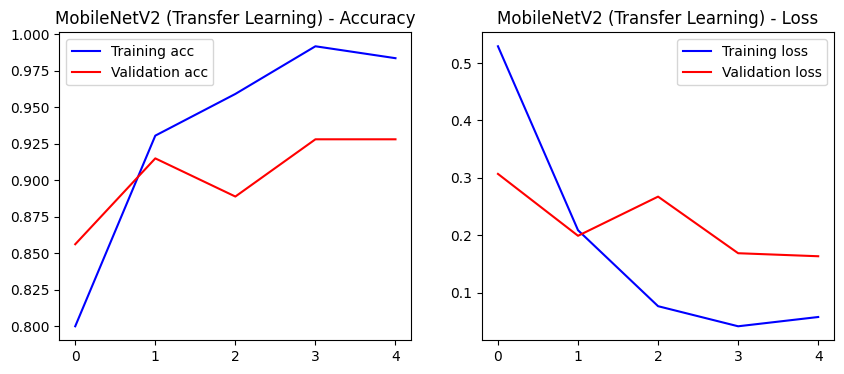

In [19]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{title} - Loss')
    plt.legend()

    plt.show()

plot_history(history_cnn, "Simple CNN")
plot_history(history_mobilenet, "MobileNetV2 (Transfer Learning)")
